# Final Project
The dataset I chose is Artist from the tidytuesday. This dataset contains data that was used for Holland Stam's thesis work, titled Quantifying art historical narratives. The data was collected to assess the demographic representation of artists through editions of Janson's History of Art and Gardner's Art Through the Ages, two of the most popular art history textbooks used in the American education system. The data was collected along with variables regarding the artists' demographics and numeric metrics for describing how much space they or their work took up in each edition of each textbook.

Please find the following link to the dataset page:
[Aritst](https://github.com/rfordatascience/tidytuesday/tree/master/data/2023/2023-01-17)

### Load the tidyverse

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Read the csv file and use the head() function to check the dataset

In [2]:
artist_df = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-17/artists.csv', show_col_types = FALSE)


In [3]:
artist_df |> head()

artist_name,edition_number,year,artist_nationality,artist_nationality_other,artist_gender,artist_race,artist_ethnicity,book,space_ratio_per_page_total,artist_unique_id,moma_count_to_year,whitney_count_to_year,artist_race_nwi
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Aaron Douglas,9,1991,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.3533658,2,0,0,Non-White
Aaron Douglas,10,1996,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.3739470,2,0,0,Non-White
Aaron Douglas,11,2001,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.3032593,2,0,0,Non-White
Aaron Douglas,12,2005,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.3770489,2,0,0,Non-White
Aaron Douglas,13,2009,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.3984097,2,0,0,Non-White
Aaron Douglas,14,2013,American,American,Male,Black or African American,Not Hispanic or Latino origin,Gardner,0.4528686,2,0,0,Non-White


### Visualisation 1: Top 5 Nationalities in Art Textbooks

The first visualization focuses on the `top nationalities` represented in these textbooks. Analyzing the data, we observe that a significant proportion of artists hails from `French, Spanish, British, American, and German nationalities`.

A little about the code: 
- `arrange` is used to sort the nationalities by artist count in descending order and then select the top N nationalities. 
- `mutate` is used to reorder the factor levels based on artist count, ensuring a sensible ordering in the bar chart.
- `geom_text` is used for annotations, providing a summary of artist counts for each nationality.

In [4]:
top_n_nationalities <- 5

# Visualization: Top N Nationalities Distribution
nationality_distribution <- artist_df %>%
  group_by(artist_nationality) %>%
  summarise(artist_count = n()) %>%
  arrange(desc(artist_count)) %>%
  head(top_n_nationalities) %>%
  mutate(artist_nationality = fct_reorder(artist_nationality, artist_count)) %>%
  ggplot(aes(x = artist_nationality, y = artist_count, fill = artist_nationality)) +
  geom_bar(stat = "identity") +
  labs(title = paste("Top", top_n_nationalities, "Nationalities in Art Textbooks"),
       x = "Nationality",
       y = "Number of Artists") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  geom_text(aes(label = artist_count), vjust = -0.5, size = 3)

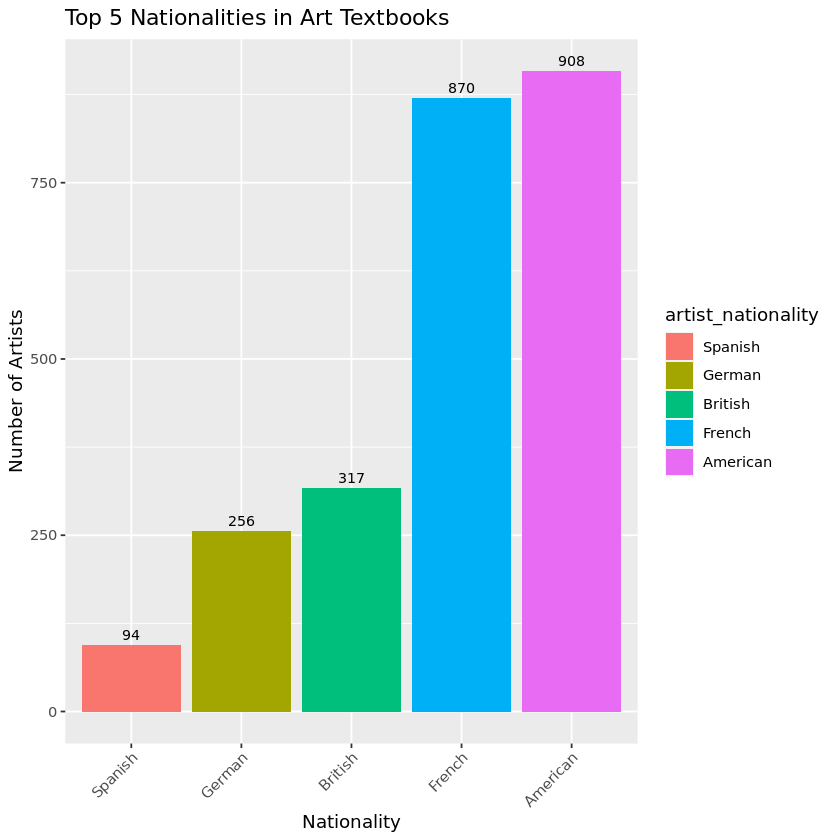

In [5]:
nationality_distribution

### Visualisation 2: Space Ratio per Page Distribution by Book
The second visualisation is the analysis of distributions of the space ratios per page based on the book and artisit's non-white indicator. The boxplot reveals interesting patterns in how space is allocated for artists in each edition. The plot provides insights into how the space allocated to artists on a page varies across different books and how it correlates with the non-white indicator for artist race.

A little about the code:
- `geom_boxplot()` adds the boxplot layer to the ggplot.
- `labs` Sets the lables for for the x-axis, y-axis, title and the legend fill color.
- `theme_minimal()` applies minial theme to the to the plot, removing unnecessary background elements and gridlines.

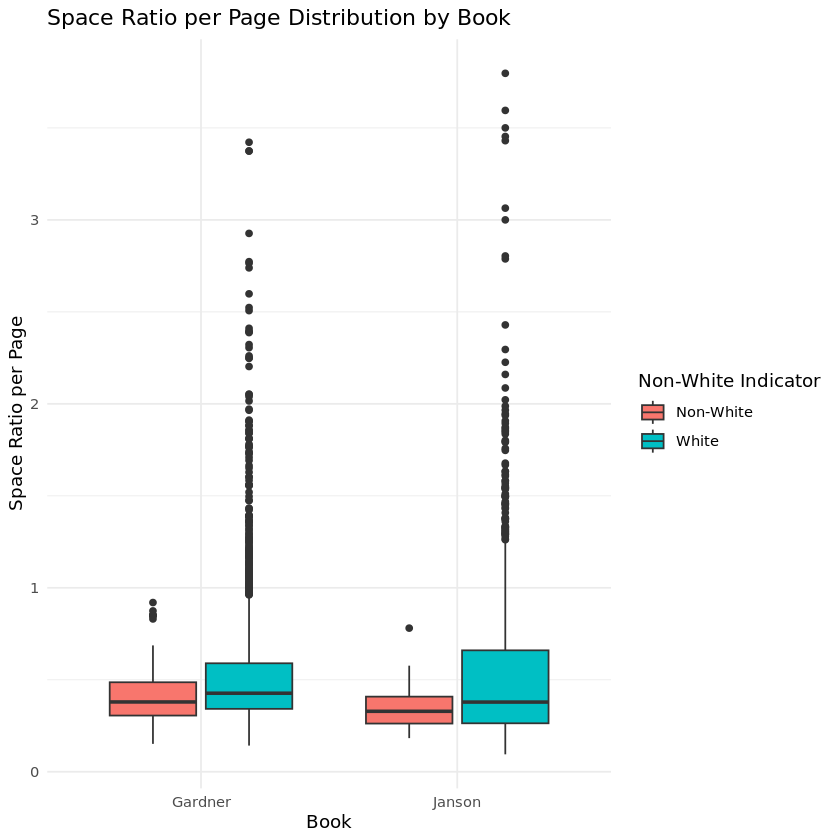

In [6]:
artist_df %>%
  ggplot(aes(x = book, y = space_ratio_per_page_total, fill = artist_race_nwi)) +
  geom_boxplot() +
  labs(title = "Space Ratio per Page Distribution by Book",
       x = "Book",
       y = "Space Ratio per Page",
       fill = "Non-White Indicator") +
  theme_minimal()

### Visualisation 3: Gender Representation of Artists
The third visualisation is a pie-chart which depicts the gender representation of artists. This chart illustrates the proportion of male and female artists through percentage labels for each providing a clear understanding of the relative contributions of the genders.

A little about the code:
 - `custom_colors` a vector that has the hex colors. These colors are used to fill the bars in the pie chart. The colors can be customised based on the preference.
 - `count(artist_gender)` counts the occurrences of each unique value in the artist_gender column, essentially summarizing the gender distribution.
 - `mutate(percentage = n / sum(n) * 100)`: This line calculates the percentage of each gender category by dividing the count (n) of each category by the total count (sum(n)) and multiplying by 100. This creates a new column called percentage.
 - `coord_polar("y")` converts the Cartesian coordinate system to a polar coordinate system, turning the bar chart into a donut chart.
 

In [7]:
custom_colors <- c("#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#FFD700")

gender_representation_donut <- artist_df %>%
  count(artist_gender) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = "", y = percentage, fill = artist_gender)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y") +
  labs(title = "Gender Representation of Artists",
       x = NULL,
       y = NULL) +
  theme_void() +
  theme(legend.position = "right") +
  geom_text(aes(label = paste0(round(percentage), "%")), position = position_stack(vjust = 0.5)) +
  scale_fill_manual(values = custom_colors)

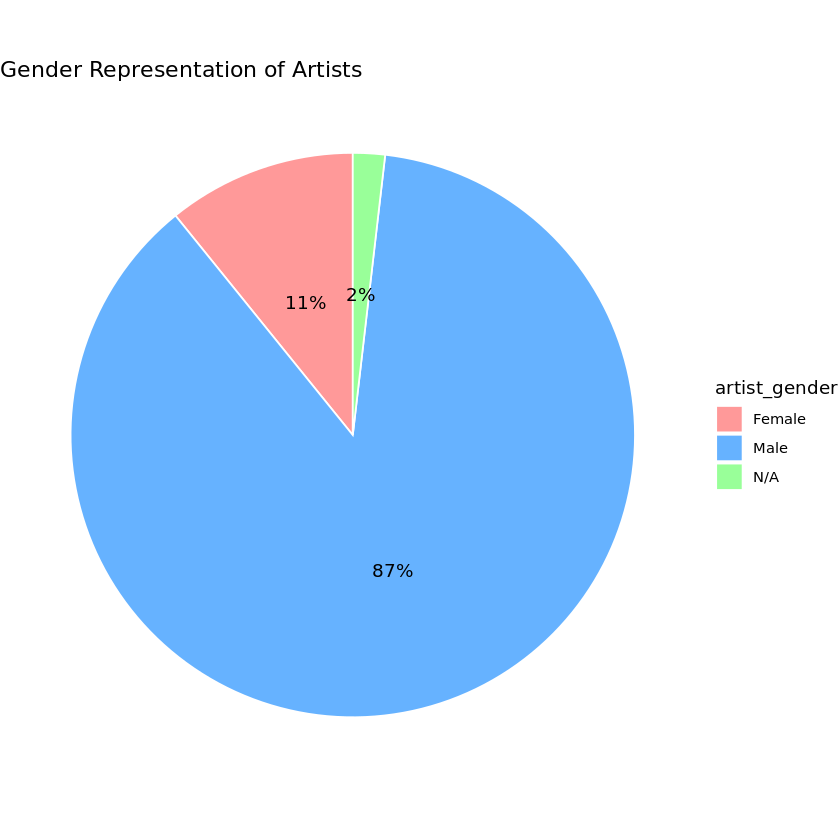

In [8]:
gender_representation_donut